# USING CAR price dataset
For learning linear regression with ridge regression and lasso, I plan to
implement the same using sklearn library

Dataset: Car price prediction

Plan: Data cleaning, EDA, linear regression, ridge regression, lasso

Plotting: R2 score and mse of each model

Later, I would like to use cross validation (in a separate script)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
df = pd.read_csv("./datasets/CarPrice_Assignment.csv")
print(df.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

## Data cleaning

As we dont require car ID, symboling and car name, I am dropping these variables

In [17]:
print(df.columns)

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [47]:
df.drop(columns=['car_ID', 'symboling', 'CarName'], axis=1, inplace=True)
print(df.head())

  fueltype aspiration doornumber      carbody drivewheel enginelocation  \
0      gas        std        two  convertible        rwd          front   
1      gas        std        two  convertible        rwd          front   
2      gas        std        two    hatchback        rwd          front   
3      gas        std       four        sedan        fwd          front   
4      gas        std       four        sedan        4wd          front   

   wheelbase  carlength  carwidth  carheight  ...  enginesize fuelsystem  \
0       88.6      168.8      64.1       48.8  ...         130       mpfi   
1       88.6      168.8      64.1       48.8  ...         130       mpfi   
2       94.5      171.2      65.5       52.4  ...         152       mpfi   
3       99.8      176.6      66.2       54.3  ...         109       mpfi   
4       99.4      176.6      66.4       54.3  ...         136       mpfi   

  boreratio  stroke compressionratio  horsepower  peakrpm  citympg  \
0      3.47    2.68   

In [61]:
# keeping a copy of original dataframe
df_tmp = df.copy(deep=True)
## box plots for continuous variables
cont_df = df_tmp.select_dtypes(include="number")
cont_df.describe()
# plt.boxplot(df_tmp.select_dtypes(include="number").drop(columns=["price", axis=1))

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Most of the variables are in different scales. A simple box plot can lead to poor visualization

For visualization, normalize the variables

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cont_df_scaled = scaler.fit_transform(cont_df)


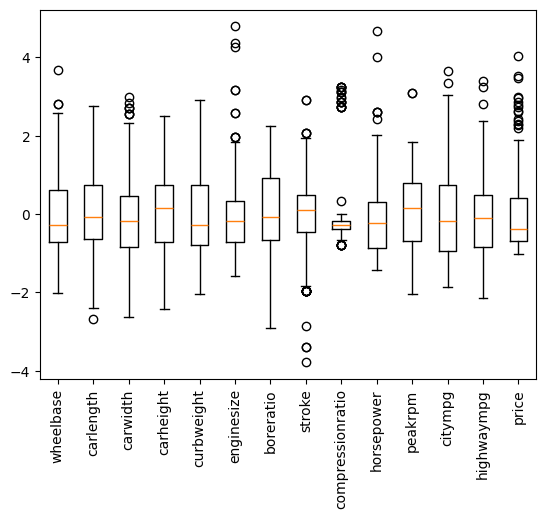

In [69]:
newdf = pd.DataFrame(cont_df_scaled, columns=cont_df.columns)
# print(newdf.head())

plt.boxplot(newdf)
locs, labels = plt.xticks()
plt.xticks(range(1, len(newdf.columns)+1), newdf.columns, rotation=90)
plt.show()

Most variables are skewed. Can we transform them? Let me work with un-transformed data

In [72]:
## label encoding
from sklearn.preprocessing import LabelEncoder
categorical_data = df.select_dtypes(exclude="number")
categorical_variables = categorical_data.columns
encode_label = LabelEncoder()
for varname in categorical_variables:
  df[varname]= encode_label.fit_transform(categorical_data[varname])
  
print(df.head())

   fueltype  aspiration  doornumber  carbody  drivewheel  enginelocation  \
0         1           0           1        0           2               0   
1         1           0           1        0           2               0   
2         1           0           1        2           2               0   
3         1           0           0        3           1               0   
4         1           0           0        3           0               0   

   wheelbase  carlength  carwidth  carheight  ...  enginesize  fuelsystem  \
0       88.6      168.8      64.1       48.8  ...         130           5   
1       88.6      168.8      64.1       48.8  ...         130           5   
2       94.5      171.2      65.5       52.4  ...         152           5   
3       99.8      176.6      66.2       54.3  ...         109           5   
4       99.4      176.6      66.4       54.3  ...         136           5   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       

In [73]:
## saving cleaned data
df.to_csv("./datasets/CarPrice_cleaned.csv", index=False)

## EDA starts now
EDA is planned in two ways: correlation among the continuous variables, box plots of price (dependent variable)
as each category as grouping variable

In [127]:
# using the original dataframe (df) which is not cleaned (categorical variables not encoded)
df_tmp2 = pd.read_csv("./datasets/CarPrice_Assignment.csv")
df_tmp2.drop(columns=['car_ID', 'symboling', 'CarName'], axis=1, inplace=True)

### Correlation

<Axes: >

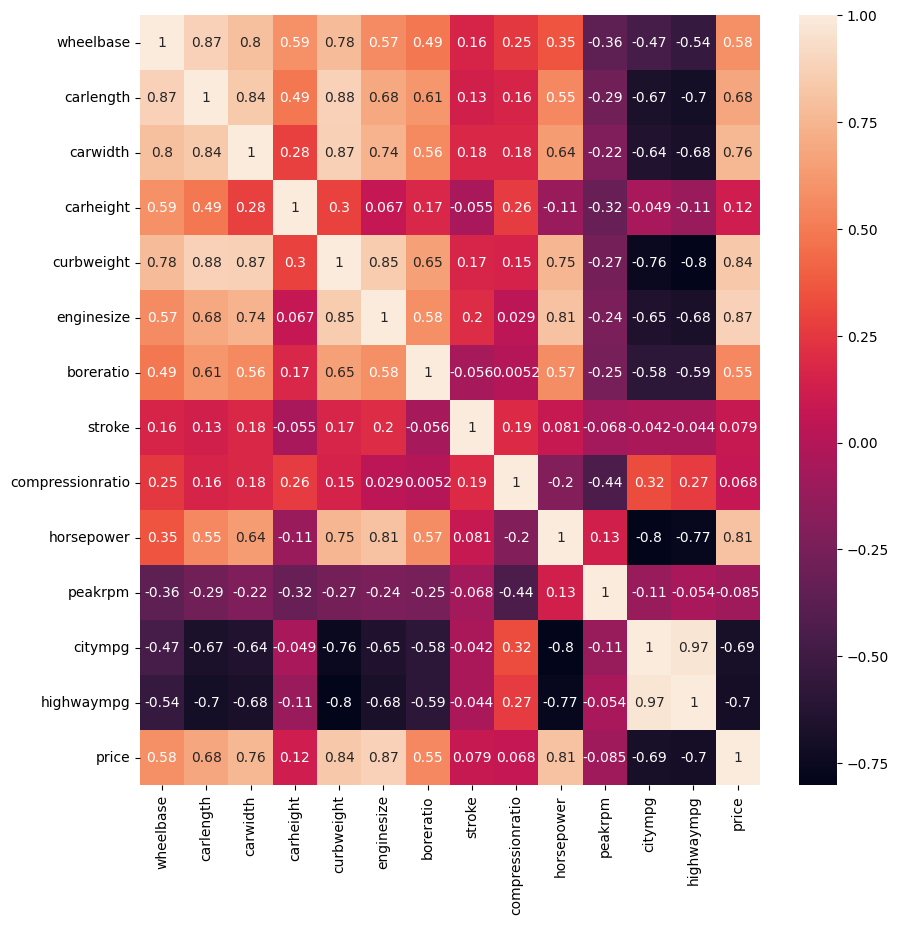

In [82]:
# Correlation
df_cont = df_tmp2.select_dtypes(include="number")
corr_vals = df_cont.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_vals, annot=True)

For the car price, highest +ve correlation was seen with variables curb width, engine size and horsepower
and highest -ve correlation w.r.t highway mpg, city mpg.

Poorly correlated variables w.r.t price are stroke, compression ratio and peak rpm

### Box plots for price vs categorical variables

In [113]:
df_cat = df_tmp2.select_dtypes(exclude="number")
df_cat["price"] = df_tmp2["price"]
print(df_cat.columns)

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'price'],
      dtype='object')


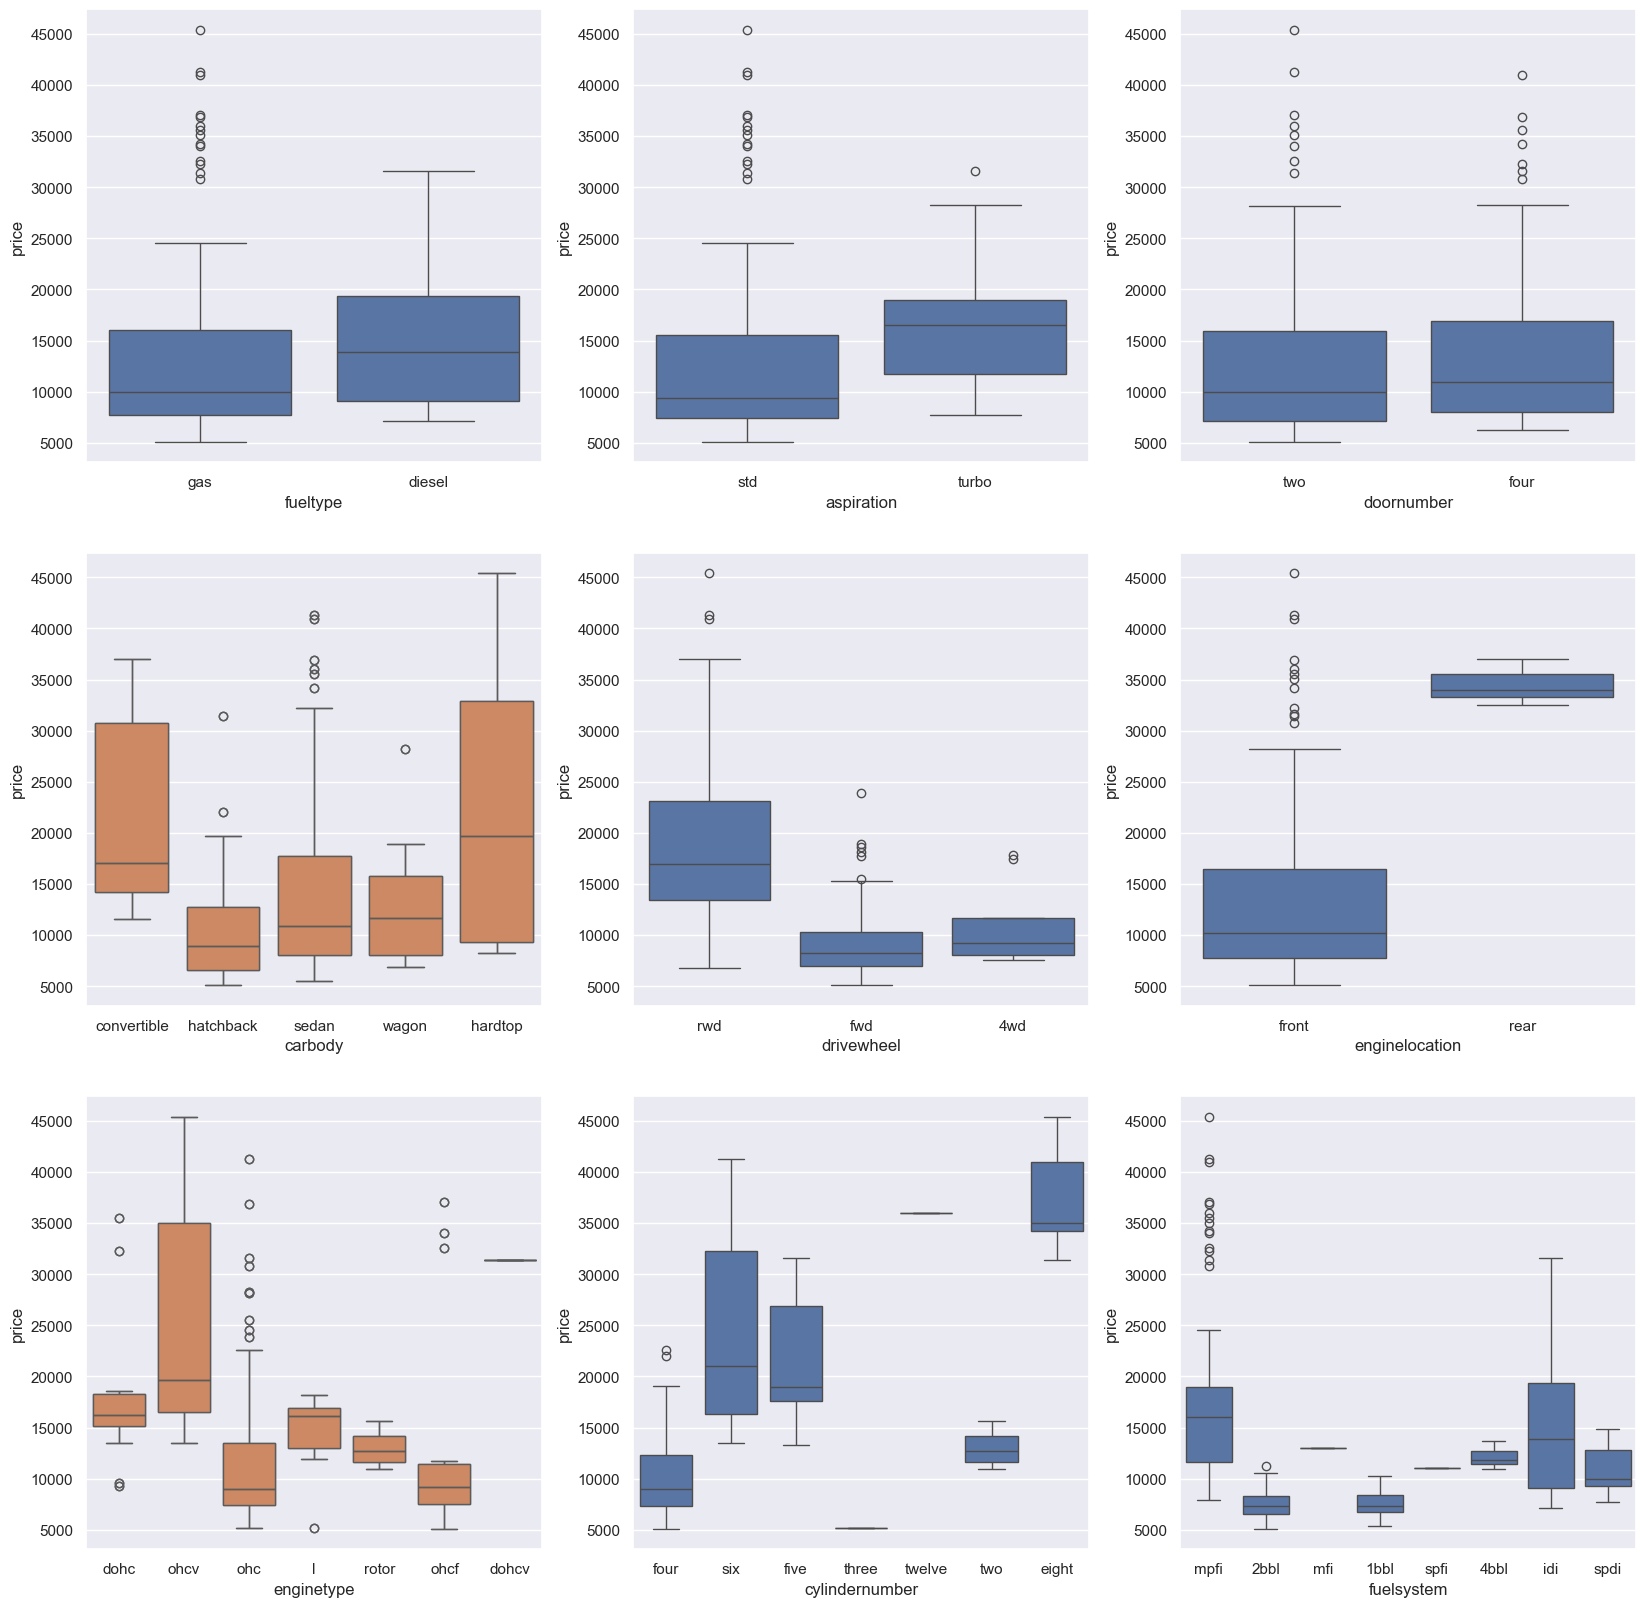

In [133]:
sns.set(rc={"figure.figsize":(20,20)})
fig, axes = plt.subplots(3, 3)
# plt.figure(figsize=(40,40))
j,k = 0,0 # i refers to row and j to column, k refers to index of the variable in columns
for i in range(3):
  while j < 3:
    varname = list(df_cat.columns)[k]
    # print(i,j,k, varname)
    sns.boxplot(data=df_cat, x=varname, y="price",ax=axes[i,j])
    j += 1
    k += 1
  else:
    i += 1
    j = 0
    if (i < 3):
      varname = list(df_cat.columns)[k]
      # print(i,j,k, varname)
      sns.boxplot(data=df_cat, x=varname, y="price",ax=axes[i,j])

Findings: Door number may not have any impact on price; engine location appears to contribute to max difference in prices;
ohcv engine type is highly priced and max price is for dohcv engine type.


It is interesting to note that cyclinder number looks like numeric data but encoded as strings.

Recode the cyclinder number as numeric

In [129]:
# making changes in df_tmp2 dataframe
cylinder_numbers = {"four":4, "six": 6, "five":5, "three":3, "twelve":12, "two":2, "eight":8}
cylinder_number = df_tmp2["cylindernumber"]
for charvals in cylinder_numbers.keys():
  cylinder_number[cylinder_number == charvals] = cylinder_numbers[charvals]
  
df_tmp2["cylindernumber"] = cylinder_number
print(df_tmp2["cylindernumber"])

0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: cylindernumber, Length: 205, dtype: object


C:\Users\srira\AppData\Local\Temp\ipykernel_29904\2113176444.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cylinder_number[cylinder_number == charvals] = cylinder_numbers[charvals]


In [131]:
print(df_tmp2.head())
df_tmp2.to_csv("./datasets/CarPrice_cleaned_new.csv", index = False)

  fueltype aspiration doornumber      carbody drivewheel enginelocation  \
0      gas        std        two  convertible        rwd          front   
1      gas        std        two  convertible        rwd          front   
2      gas        std        two    hatchback        rwd          front   
3      gas        std       four        sedan        fwd          front   
4      gas        std       four        sedan        4wd          front   

   wheelbase  carlength  carwidth  carheight  ...  enginesize fuelsystem  \
0       88.6      168.8      64.1       48.8  ...         130       mpfi   
1       88.6      168.8      64.1       48.8  ...         130       mpfi   
2       94.5      171.2      65.5       52.4  ...         152       mpfi   
3       99.8      176.6      66.2       54.3  ...         109       mpfi   
4       99.4      176.6      66.4       54.3  ...         136       mpfi   

  boreratio  stroke compressionratio  horsepower  peakrpm  citympg  \
0      3.47    2.68   

## Model training
As the EDA is now complete, using the new cleaned dataset, predict the prices. Label encoding is to be performed again

### MODEL SET 1 - includes all variables

In [2]:
df_model2 = pd.read_csv("./datasets/CarPrice_cleaned_new.csv")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
X = df_model2.drop("price", axis = 1)
y = df_model2["price"]
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1987)
print(xtrain.shape, xtest.shape)
print(xtrain["enginetype"])

(164, 22) (41, 22)
29      ohc
6       ohc
74     ohcv
191     ohc
31      ohc
       ... 
103    ohcv
60      ohc
70      ohc
163     ohc
14      ohc
Name: enginetype, Length: 164, dtype: object


In [4]:
# data scaling
# scaling can't be performed for categorical variables
cat_vars = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem']

scaler = StandardScaler()

x_train_cont = scaler.fit_transform(xtrain.drop(columns = [i for i in xtrain.columns if i in cat_vars], axis = 1))
x_test_cont = scaler.transform(xtest.drop(columns = [i for i in xtrain.columns if i in cat_vars], axis = 1))
print(f"Continuous data: {x_train_cont.shape}, {x_test_cont.shape}")
all_cols = X.columns
# label encoding
x_train_cat = pd.DataFrame(columns=[i for i in all_cols if i in cat_vars])

x_test_cat = pd.DataFrame(columns=[i for i in all_cols if i in cat_vars])
from sklearn.preprocessing import LabelEncoder
x_train_categorical_data = xtrain.select_dtypes(exclude="number")
x_test_categorical_data = xtest.select_dtypes(exclude="number")
categorical_variables = x_train_categorical_data.columns
encode_label = LabelEncoder()

for varname in categorical_variables:
  x_train_categorical_data[varname]= encode_label.fit_transform(x_train_categorical_data[varname])
  x_test_categorical_data[varname]= encode_label.transform(x_test_categorical_data[varname])

print(f"Categorical data: {x_train_categorical_data.shape},{x_test_categorical_data.shape}")

xtrain1 = np.append(x_train_cont, x_train_categorical_data, axis=1)
xtest1 = np.append(x_test_cont, x_test_categorical_data, axis=1)
print(xtrain1.shape, xtest1.shape)


Continuous data: (164, 14), (41, 14)
Categorical data: (164, 8),(41, 8)
(164, 22) (41, 22)



### Multiple linear regression

In [5]:
regress1 = LinearRegression(n_jobs = -1)
regress1.fit(xtrain1, ytrain)
ypred_all = regress1.predict(xtest1)



In [6]:
print(len(ypred_all), len(ytest))
r2score = r2_score(ytest, ypred_all)
adjr2 = 1 - ((1-r2score) * len(ytest) - 1) / (len(ytest) - xtest.shape[1] - 1 )
# print(r2score)
# print(adjr2)
mse = mean_squared_error(ytest,ypred_all)
mae = mean_absolute_error(ytest,ypred_all)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, ypred_all)
print(f"For multiple regression with all vars:\nMean squared error: {mse}\nMean absolute error: {mae}\nR2: {r2score}\nAdjusted R2: {adjr2}")
# print(f"Regression coefficient: [regression.coef_}\nIntercept: {regression.intercept_}")

41 41
For multiple regression with all vars:
Mean squared error: 7020478.107798957
Mean absolute error: 2028.4630644692472
R2: 0.7969237221497382
Adjusted R2: 0.5929929226744035


## Ridge regression

In [7]:
from sklearn.linear_model import Ridge
regress1_ridge = Ridge()
regress1_ridge.fit(xtrain1, ytrain)
ypred_all_ridge = regress1_ridge.predict(xtest1)

In [8]:
r2score = r2_score(ytest, ypred_all_ridge)
adjr2 = 1 - ((1-r2score) * len(ytest) - 1) / (len(ytest) - xtest.shape[1] - 1 )
# print(r2score)
# print(adjr2)
mse = mean_squared_error(ytest,ypred_all_ridge)
mae = mean_absolute_error(ytest,ypred_all_ridge)
rmse = np.sqrt(mse)

print(f"For ridge regression with all vars:\nMean squared error: {mse}\nMean absolute error: {mae}\nR2: {r2score}\nAdjusted R2: {adjr2}")

For ridge regression with all vars:
Mean squared error: 6837238.1633382095
Mean absolute error: 2011.6443665880254
R2: 0.8022241711082272
Adjusted R2: 0.6050661675242952


### Lasso

In [9]:
from sklearn.linear_model import Lasso
regress1_lasso = Lasso()
regress1_lasso.fit(xtrain1, ytrain)
ypred_all_lasso = regress1_lasso.predict(xtest1)

In [10]:
r2score = r2_score(ytest, ypred_all_lasso)
adjr2 = 1 - ((1-r2score) * len(ytest) - 1) / (len(ytest) - xtest.shape[1] - 1 )
# print(r2score)
# print(adjr2)
mse = mean_squared_error(ytest,ypred_all_lasso)
mae = mean_absolute_error(ytest,ypred_all_lasso)
rmse = np.sqrt(mse)

print(f"For lasso regression with all vars:\nMean squared error: {mse}\nMean absolute error: {mae}\nR2: {r2score}\nAdjusted R2: {adjr2}")

For lasso regression with all vars:
Mean squared error: 6933312.922672971
Mean absolute error: 2019.344083024776
R2: 0.7994450862337384
Adjusted R2: 0.5987360297546265


In [11]:
# plotting different predictions against ytest

pred_df = pd.DataFrame(columns=["ytest", "ypred_all", "ypred_all_ridge", "ypred_all_lasso"])
pred_df["ytest"] = ytest
pred_df["ypred_all"] = ypred_all
pred_df["ypred_all_ridge"] = ypred_all_ridge
pred_df["ypred_all_lasso"] = ypred_all_lasso
print(pred_df.head())

       ytest     ypred_all  ypred_all_ridge  ypred_all_lasso
111  15580.0  19633.314367     18554.078625     19511.130723
132  11850.0  12557.366166     13163.700753     12593.617409
162   9258.0   6966.332284      6831.792280      6965.388840
11   16925.0  11937.418054     11828.721512     11866.415515
113  16695.0  20411.210629     18983.354567     20254.314065


#### plotting for visualization

<Axes: xlabel='ytest', ylabel='ypred_all'>

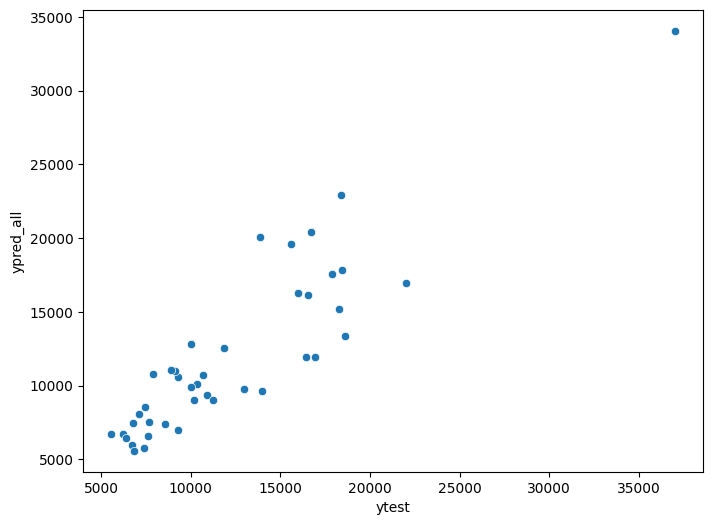

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=pred_df, x="ytest", y="ypred_all")

<Axes: xlabel='ytest', ylabel='ypred_all_ridge'>

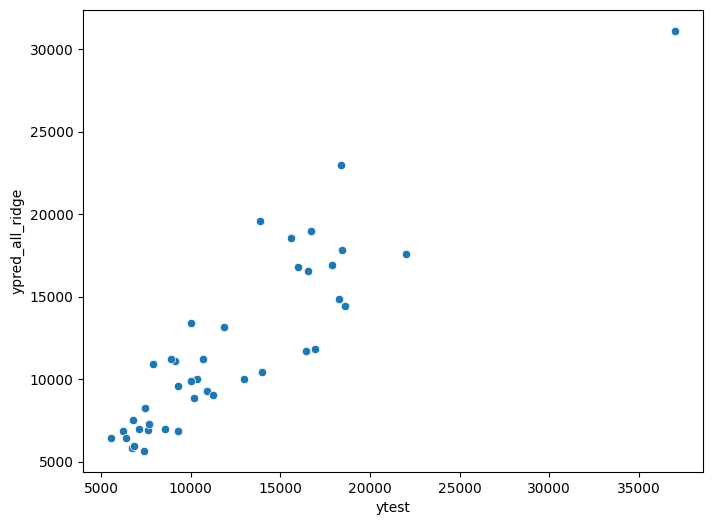

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=pred_df, x="ytest", y="ypred_all_ridge")

<Axes: xlabel='ytest', ylabel='ypred_all_lasso'>

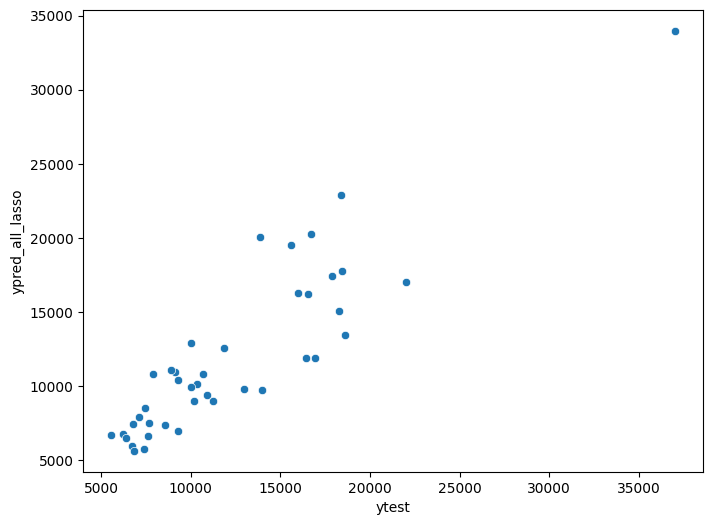

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=pred_df, x="ytest", y="ypred_all_lasso")

Not much improvement in model using Lasso. only ~1% improvement in using Ridge regression